In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [10]:
# Step 1: Load and explore the datasets
import pandas as pd

# Example path on Windows (adjust if needed)
threats_path = "C:/Users/ASWATHY/Downloads/cyber security threats dataset.xlsx"
errors_path = "C:/Users/ASWATHY/Downloads/Manual Errors.xlsx"

# Load Excel files
threats_df = pd.read_excel(threats_path)
errors_df = pd.read_excel(errors_path)

print("Threats and Errors datasets loaded successfully!")

Threats and Errors datasets loaded successfully!


In [3]:
# Basic exploration of datasets
display(threats_df.head())
threats_df.info()
threats_df.describe()

print("Label column description:")
print(threats_df["label"].describe())

print("Shape of threats dataset:", threats_df.shape)

display(errors_df.head())
errors_df.info()
errors_df.describe()

,flow_id,timestamp,src_ip,src_port,dst_ip,dst_port,protocol,duration,packets_count,total_payload_bytes,...,bwd_packets_IAT_mean,bwd_packets_IAT_std,bwd_packets_IAT_max,bwd_packets_IAT_min,bwd_packets_IAT_total,subflow_fwd_packets,subflow_bwd_packets,subflow_fwd_bytes,subflow_bwd_bytes,label
0,192.168.10.9_1841_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:13.991,192.168.10.9,1841,205.174.165.73,8080,TCP,0.135358,8,322,...,0.044844,0.061008,0.131123,0.001660,0.134532,0.0,0.0,0.0,0.0,Botnet_ARES
1,192.168.10.9_1845_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:24.131,192.168.10.9,1845,205.174.165.73,8080,TCP,0.128585,8,322,...,0.042638,0.057734,0.124286,0.001701,0.127915,0.0,0.0,0.0,0.0,Botnet_ARES
2,192.168.10.9_1846_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:34.262,192.168.10.9,1846,205.174.165.73,8080,TCP,0.166355,10,325,...,0.041467,0.070571,0.163697,0.000204,0.165869,0.0,0.0,0.0,0.0,Botnet_ARES
3,192.168.10.9_1847_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:34.527,192.168.10.9,1847,205.174.165.73,8080,TCP,0.065549,8,1986,...,0.021602,0.028732,0.062233,0.001017,0.064805,0.0,0.0,0.0,0.0,Botnet_ARES
4,192.168.10.9_1848_205.174.165.73_8080_TCP_2017...,2017-07-07 09:04:44.595,192.168.10.9,1847,205.174.165.73,8080,TCP,0.080872,8,322,...,0.026761,0.036088,0.077792,0.000637,0.080284,0.0,0.0,0.0,0.0,Botnet_ARES


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11922 entries, 0 to 11921
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   flow_id                 11922 non-null  object        
 1   timestamp               11922 non-null  datetime64[ns]
 2   src_ip                  11922 non-null  object        
 3   src_port                11922 non-null  int64         
 4   dst_ip                  11922 non-null  object        
 5   dst_port                11922 non-null  int64         
 6   protocol                11922 non-null  object        
 7   duration                11922 non-null  float64       
 8   packets_count           11922 non-null  int64         
 9   total_payload_bytes     11922 non-null  int64         
 10  total_header_bytes      11922 non-null  int64         
 11  bwd_total_header_bytes  11922 non-null  int64         
 12  avg_segment_size        11922 non-null  float6

,User_ID,Role,Password,Software_Updated,Security_Training,Incident_History,Risk_Level_Numeric,Password_Strength,Risk_Level
0,1001,Student,7hqwv,No,No,Phishing,0,Very Weak,High
1,1002,Faculty,cjml,No,No,Data Breach,0,Very Weak,High
2,1003,Staff,asuy,No,Yes,Phishing,0,Very Weak,High
3,1004,Admin,kcyth,No,Yes,Data Breach,0,Very Weak,High
4,1005,Student,whcq,Yes,No,Phishing,0,Very Weak,High


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   User_ID             1000 non-null   int64 
 1   Role                1000 non-null   object
 2   Password            1000 non-null   object
 3   Software_Updated    1000 non-null   object
 4   Security_Training   1000 non-null   object
 5   Incident_History    800 non-null    object
 6   Risk_Level_Numeric  1000 non-null   int64 
 7   Password_Strength   1000 non-null   object
 8   Risk_Level          1000 non-null   object
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


,User_ID,Risk_Level_Numeric
count,1000.000000,1000.000000
mean,1500.500000,2.000000
std,288.819436,1.414921
min,1001.000000,0.000000
25%,1250.750000,1.000000
50%,1500.500000,2.000000
75%,1750.250000,3.000000
max,2000.000000,4.000000


In [4]:
# Step 2: Data Preprocessing
# Check for missing values
print("Null values in threats_df:")
print(threats_df.isnull().sum())

print("Total null values in threats_df:", threats_df.isnull().sum().sum())

print("\nNull values in errors_df:")
print(errors_df.isnull().sum())

print("Total null values in errors_df:", errors_df.isnull().sum().sum())

Null values in threats_df:
flow_id                   0
timestamp                 0
src_ip                    0
src_port                  0
dst_ip                    0
dst_port                  0
protocol                  0
duration                  0
packets_count             0
total_payload_bytes       0
total_header_bytes        0
bwd_total_header_bytes    0
avg_segment_size          0
bytes_rate                0
packets_rate              0
packet_IAT_total          0
fwd_packets_IAT_mean      0
fwd_packets_IAT_std       0
fwd_packets_IAT_max       0
fwd_packets_IAT_min       0
fwd_packets_IAT_total     0
bwd_packets_IAT_mean      0
bwd_packets_IAT_std       0
bwd_packets_IAT_max       0
bwd_packets_IAT_min       0
bwd_packets_IAT_total     0
subflow_fwd_packets       0
subflow_bwd_packets       0
subflow_fwd_bytes         0
subflow_bwd_bytes         0
label                     0
dtype: int64
Total null values in threats_df: 0

Null values in errors_df:
User_ID                 0
Role

In [5]:
# Check unique labels in threats dataset
unique_threats = threats_df['label'].unique()
print("Unique threat categories:", unique_threats)

Unique threat categories: ['Botnet_ARES' 'DDoS_LOIT' 'DoS_GoldenEye' 'DoS_Hulk' 'DoS_Slowhttptest'
 'DoS_Slowloris' 'Port_Scan' 'SSH-Patator' 'thursday_Benign'
 'Tuesday_Benign' 'Web_Brute_Force' 'Web_SQL_Injection' 'Web_XSS'
 'Wednesday_Benign']


In [6]:
# Label encoding for categorical columns except label (which is encoded separately)
le = LabelEncoder()

categorical_cols = threats_df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('label')  # keep label separate

for col in categorical_cols:
    threats_df[col] = le.fit_transform(threats_df[col].astype(str))

# Encode the label column
y = le.fit_transform(threats_df['label'])

# Create a mapping dictionary of encoded label to original
label_mapping_dict = dict(zip(y, threats_df['label']))
print("Label Encoding Mapping (Encoded Value -> Original Threat Category):")
print(label_mapping_dict)

Label Encoding Mapping (Encoded Value -> Original Threat Category):
{0: 'Botnet_ARES', 1: 'DDoS_LOIT', 2: 'DoS_GoldenEye', 3: 'DoS_Hulk', 4: 'DoS_Slowhttptest', 5: 'DoS_Slowloris', 6: 'Port_Scan', 7: 'SSH-Patator', 13: 'thursday_Benign', 8: 'Tuesday_Benign', 9: 'Web_Brute_Force', 10: 'Web_SQL_Injection', 11: 'Web_XSS', 12: 'Wednesday_Benign'}


In [7]:
# Encoding errors_df categorical columns
for col in errors_df.select_dtypes(include=['object']).columns:
    errors_df[col] = le.fit_transform(errors_df[col].astype(str))

Threats Dataset Columns:
 Index(['flow_id', 'timestamp', 'src_ip', 'src_port', 'dst_ip', 'dst_port',
       'protocol', 'duration', 'packets_count', 'total_payload_bytes',
       'total_header_bytes', 'bwd_total_header_bytes', 'avg_segment_size',
       'bytes_rate', 'packets_rate', 'packet_IAT_total',
       'fwd_packets_IAT_mean', 'fwd_packets_IAT_std', 'fwd_packets_IAT_max',
       'fwd_packets_IAT_min', 'fwd_packets_IAT_total', 'bwd_packets_IAT_mean',
       'bwd_packets_IAT_std', 'bwd_packets_IAT_max', 'bwd_packets_IAT_min',
       'bwd_packets_IAT_total', 'subflow_fwd_packets', 'subflow_bwd_packets',
       'subflow_fwd_bytes', 'subflow_bwd_bytes', 'label'],
      dtype='object')

Manual Errors Dataset Columns:
 Index(['User_ID', 'Role', 'Password', 'Software_Updated', 'Security_Training',
       'Incident_History', 'Risk_Level_Numeric', 'Password_Strength',
       'Risk_Level'],
      dtype='object')


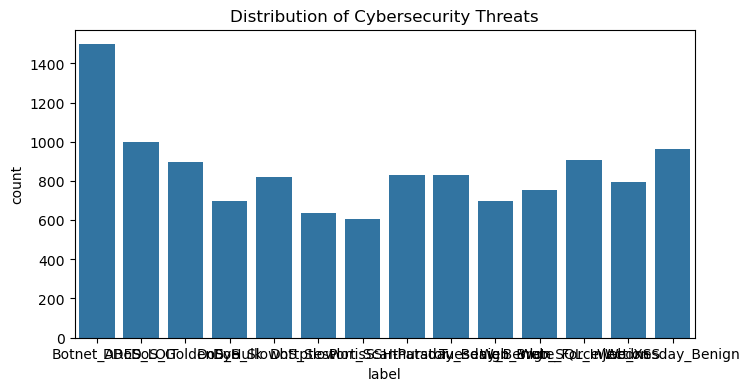

label
Botnet_ARES          1498
DDoS_LOIT             998
Wednesday_Benign      962
Web_SQL_Injection     906
DoS_GoldenEye         898
SSH-Patator           828
thursday_Benign       828
DoS_Slowhttptest      818
Web_XSS               796
Web_Brute_Force       754
DoS_Hulk              698
Tuesday_Benign        696
DoS_Slowloris         638
Port_Scan             604
Name: count, dtype: int64


In [8]:
# Step 3: Exploratory Data Analysis (EDA)
print("Threats Dataset Columns:\n", threats_df.columns)
print("\nManual Errors Dataset Columns:\n", errors_df.columns)
# Distribution of Cybersecurity Threats
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=threats_df)
plt.title('Distribution of Cybersecurity Threats')
plt.show()

print(threats_df['label'].value_counts())

In [9]:
# Create and fit a dedicated LabelEncoder for threats
label_encoder = LabelEncoder()
threats_df['label_encoded'] = label_encoder.fit_transform(threats_df['label'])

# Save features and labels
X = threats_df.drop(columns=['label', 'label_encoded', 'flow_id', 'timestamp', 'protocol', 'dst_ip', 'src_ip'], errors='ignore')
y = threats_df['label_encoded']

# Proceed with train-test split and scaling as before

In [10]:
"""# Step 4: Feature Selection and Engineering
# Drop irrelevant columns and prepare feature matrix X and target vector y
if 'label' in threats_df.columns:
    X = threats_df.drop(columns=['label', "flow_id", "timestamp", "protocol", "dst_ip", "src_ip"])
    y = threats_df['label']

else:
    raise ValueError("The dataset does not contain a 'label' column.")
# Replace 0s with column mean excluding zeros in numeric columns
zero_counts = (X == 0).sum()
print("Columns with zeros:\n", zero_counts[zero_counts > 0])

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    mean_value = X[col][X[col] != 0].mean()
    X[col] = X[col].replace(0, mean_value)

zero_counts_after = (X == 0).sum()
print("Columns with zeros after replacement:\n", zero_counts_after[zero_counts_after > 0])
"""

'# Step 4: Feature Selection and Engineering\n# Drop irrelevant columns and prepare feature matrix X and target vector y\nif \'label\' in threats_df.columns:\n    X = threats_df.drop(columns=[\'label\', "flow_id", "timestamp", "protocol", "dst_ip", "src_ip"])\n    y = threats_df[\'label\']\n\nelse:\n    raise ValueError("The dataset does not contain a \'label\' column.")\n# Replace 0s with column mean excluding zeros in numeric columns\nzero_counts = (X == 0).sum()\nprint("Columns with zeros:\n", zero_counts[zero_counts > 0])\n\nnumeric_cols = X.select_dtypes(include=[\'float64\', \'int64\']).columns\nfor col in numeric_cols:\n    mean_value = X[col][X[col] != 0].mean()\n    X[col] = X[col].replace(0, mean_value)\n\nzero_counts_after = (X == 0).sum()\nprint("Columns with zeros after replacement:\n", zero_counts_after[zero_counts_after > 0])\n'

In [11]:
# Step 5: Train/Test Split and Scaling
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Step 6: Model Building, Training, and Evaluation
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:\n", results[model_name]["Confusion Matrix"])
    print("Classification Report:\n", results[model_name]["Classification Report"])
    print("-" * 60)

Model: Random Forest
Accuracy: 0.9866
Confusion Matrix:
 [[312   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 192   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 173   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 123   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 178   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 120   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 132   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 161   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 127   0   0   0   0   8]
 [  0   0   0   0   0   0   0   0   0 131   0   7   2   0]
 [  0   0   0   0   0   0   0   0   0   0 186   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 147   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0 198   0]
 [  0   0   0   0   0   0   0   0   8   2   2   0   0 173]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00    

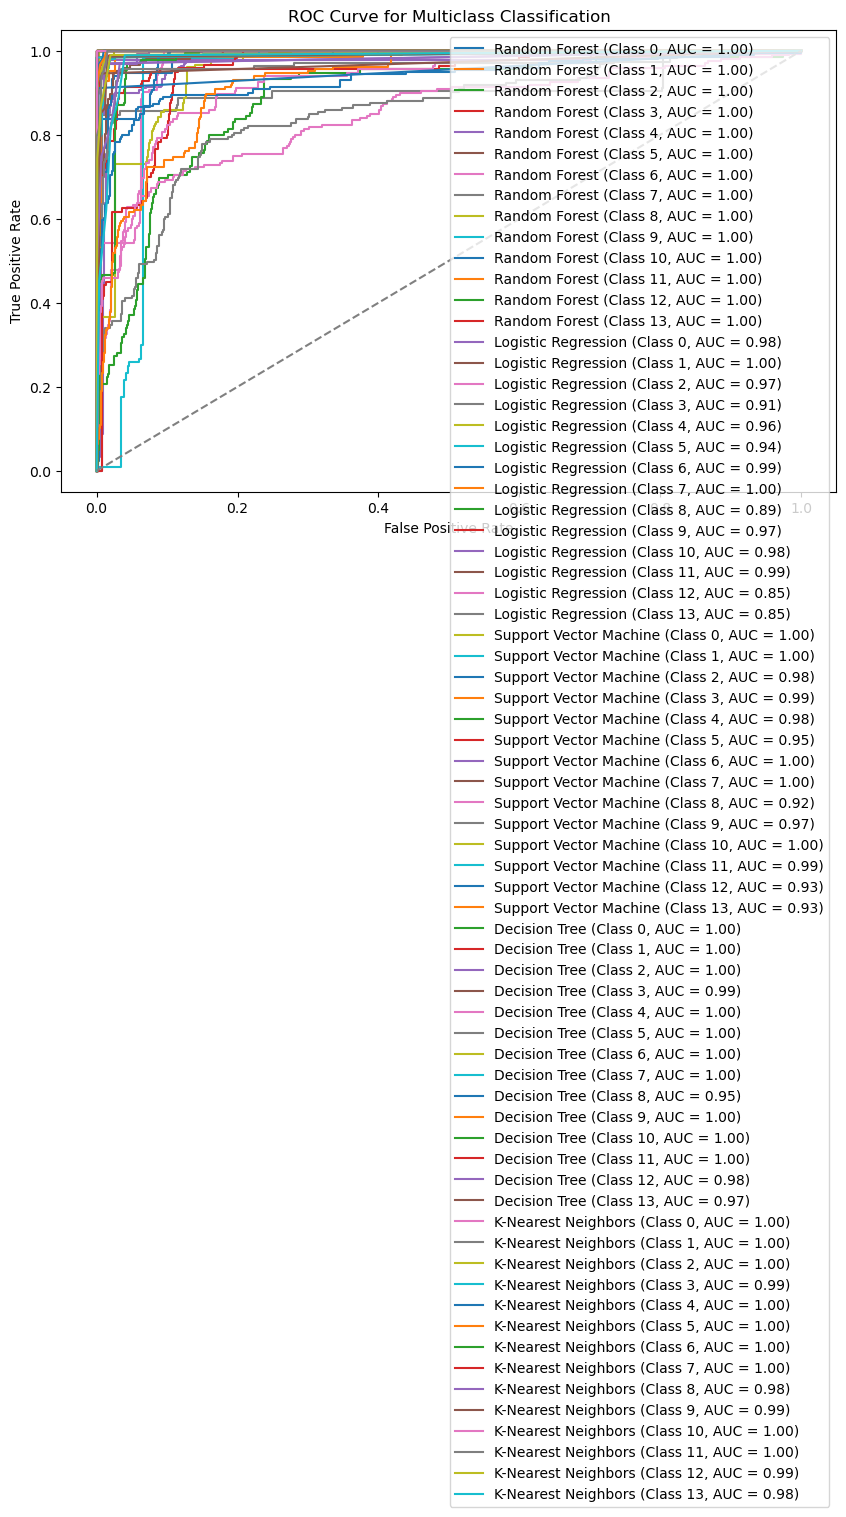

Macro-Averaged ROC-AUC: 1.00


In [13]:
# Step 7: ROC Curve and AUC Score for Models with Probability Output
# Binarize labels for ROC-AUC
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            auc_score = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{model_name} (Class {i}, AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Classification")
plt.legend()
plt.show()
# Calculate and print macro-averaged ROC-AUC for the last model with probability
if hasattr(model, "predict_proba"):
    macro_auc = roc_auc_score(y_test_bin, y_prob, multi_class="ovr", average="macro")
    print(f"Macro-Averaged ROC-AUC: {macro_auc:.2f}")

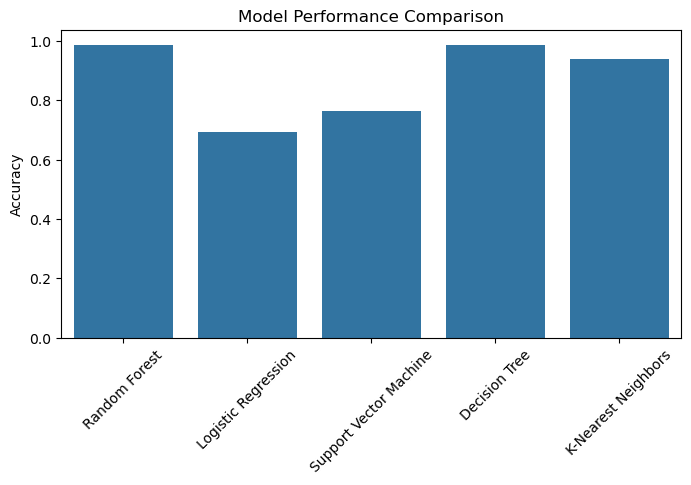

In [14]:
# Step 8: Model Performance Comparison Plot
plt.figure(figsize=(8, 4))
model_names = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in model_names]
sns.barplot(x=model_names, y=accuracies)
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

In [15]:
# Step 9: Best Model Selection and Prediction on New Data
best_model_name = max(results, key=lambda model: results[model]["Accuracy"])
best_model_accuracy = results[best_model_name]["Accuracy"]

print(f"The best model is: {best_model_name}")
print(f"Accuracy of the best model: {best_model_accuracy:.4f}")

best_model = models[best_model_name]
print(best_model)

The best model is: Decision Tree
Accuracy of the best model: 0.9874
DecisionTreeClassifier(random_state=42)


In [16]:
# Example new data for prediction (ensure it matches your feature columns)
new_data = pd.DataFrame([[51700, 8080, 0.22497797, 10, 334, 224, 112, 33.4, 1484.589801, 44.44879645, 0.22497797,
                          0.05605274, 0.0961889, 0.222656012, 4.79221E-05, 0.224210978, 0.05609125, 0.09583621,
                          0.222080946, 3.09944E-06, 0.224364996, 0, 0, 0, 0]],
                        columns=X.columns)

# Scale new data
new_data_scaled = scaler.transform(new_data)

# Make prediction
prediction = best_model.predict(new_data_scaled)
predicted_label_encoded = prediction[0]
predicted_label = label_encoder.inverse_transform([predicted_label_encoded])[0]

print("Predicted Threat Category:", predicted_label)

Predicted Threat Category: Botnet_ARES


In [17]:
# Threat category to description mapping
threat_descriptions = {
    'Botnet_ARES': "A network of compromised devices controlled remotely for malicious activities.",
    'DDoS_LOIT': "Distributed Denial-of-Service attack using LOIT tools.",
    'DoS_GoldenEye': "HTTP request flooding to exhaust server resources.",
    'DoS_Hulk': "High-speed HTTP request attack.",
    'DoS_Slowhttptest': "Exploits slow HTTP connections.",
    'DoS_Slowloris': "Keeps connections open to block new ones.",
    'Port_Scan': "Detects open ports on a target.",
    'SSH-Patator': "Brute-force attack on SSH.",
    'thursday_Benign': "Normal traffic on Thursday.",
    'Tuesday_Benign': "Normal traffic on Tuesday.",
    'Web_Brute_Force': "Tries to guess web app login credentials.",
    'Web_SQL_Injection': "Injects SQL commands into web apps.",
    'Web_XSS': "Cross-site scripting attack.",
    'Wednesday_Benign': "Normal traffic on Wednesday."
}

# Get description
print("Description:", threat_descriptions.get(predicted_label, "No description available."))

Description: A network of compromised devices controlled remotely for malicious activities.
